# Content
- Test a distribution for goodness of fit (does preference exist?)
- Test a variable for normality
- Tests using contingency tables
    - Test two variables for independence
    - Test proportions for homogeneity

In [1]:
# Imports
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.formula.api import OLS
from statsmodels.api import add_constant
import numpy as np
import pandas as pd
import math
import pylab
import seaborn as sns

In [2]:
# Generic functions

def preferred_rounding(v, decimals=2):
    return str(round(v, decimals))

# Test a distribution for goodness of fit

## Definition

We use the **chi-square goodness of fit test** to **find out if a frequency distribution fits a specific pattern**.

The idea is to compare the distribution of **observed values** with the distribution of **actual values**. 
While the frequency will always be different due to sampling errors, the question is: are these differences significant (i.e. a preference exists) or due to chance?

We answer this question with the **chi-square goodness of fit test**.

The test is called that way, because it is about seeing how close the observed values and expected values are together. 

*Basically, recognizing a good fit on a chart.*

## Questions

### What is difference between goodness-of-fit test and chi-square variance test?
Chi-square variance test tests compares a sample variance with a hypothesized population variance, while a goodness-of-fit test compares an observed/real distribution (obtained from a sample) with and hypothesized expected (theoretical) distribution.

### Which number gives the probability of a type I error?
p-value.


## Applications

Footwear manufacturer wants to meet customer demand by determining preference for specific styles.

Hotline wants to see if receiving more calls at specific times of a day for preparing staff.

**Useful to know whether numbers generated are random.**

## Hypothesis

H0: no preference (higher frequency) for specific styles

H1: preference for specific styles

## Assumptions

- Data from random sample
- Expected frequency for each category >= 5

## Critical values

Always **right-tailed** test since (O-E)² >= 0.

And we use the **chi-square distribution table**.

## Formula

O = observed frequency

E = expected frequency

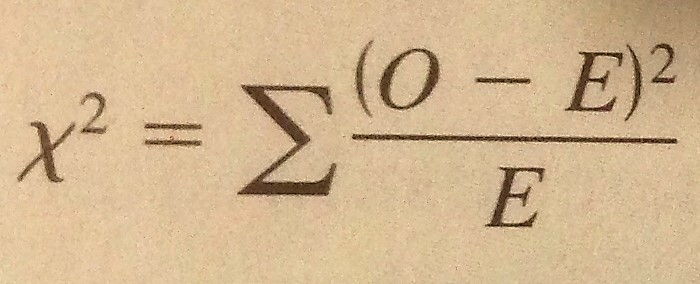

## Implementation

In [3]:
def compute_chisquare_goodness_of_fit_test(
    observed_value_list,
    expected_value_list,
):
    test_tuple = stats.chisquare(observed_value_list, f_exp=expected_value_list)
    return test_tuple[0], test_tuple[1]


def get_chisquare_score_from_probability(
    alpha,
    df,    
):
    # Call the inverse survival function
    return stats.chi2.isf(alpha, df)
    

def compute_hypothesis_test_for_preference(
    dataset_observed,
    dataset_expected,
    significance_level=.05,
    ddof = 1,
):
    r"""
    Conduct a statistical hypothesis test to check if there is a preferrence for a dataset. 
    The claim is the alternative hypothesis and the problem statement has to be formulated as such.
    """ 
    
    dataset_np1 = np.array(dataset_observed)
    n1 = len(dataset_observed) # sample size

    dataset_np2 = np.array(dataset_expected)
    n2 = len(dataset_np2) # sample size
    
    df = n1-ddof

    
    # 1. Hypothesis
    print()
    print('1. Hypothesis')
    
    # Statement
    h0 = 'H0: there is no preference'
    h1 = 'H1: there is a preference'
    print(h0, 'and', h1, '(claim)')
    
    # 2. Critical value(s)
    print()
    print('2. Critical value(s)')
   
    cv_right = get_chisquare_score_from_probability(        
        significance_level,
        df,
    )
    print('C.V. =', preferred_rounding(cv_right), '(right-tailed)')
    

    # 3. Test value
    print()
    print('3. Test value')
    
    # Hypothesis test for a variance or 
    print('Test type: chi square goodness of fit test')

    # test value and p-value
    test_value, p_value = compute_chisquare_goodness_of_fit_test(
        dataset_np1,
        dataset_np2,
    )
    
    print('test value = ', preferred_rounding(test_value))
    print('P-value =', preferred_rounding(p_value, 4))
        
        
    # 4. Result and decision (traditional method)
    print()
    print('4. Result and decision (traditional method)')
    
    decision_statement = 'reject'
    evidence_statement = 'enough evidence'
    if cv_right > test_value:
        decision_statement = 'not reject'
        evidence_statement = 'not enough evidence'
            
    print('The decision is to', decision_statement, 'the null hypothesis.')

## Examples

In [26]:
# Preference for food flavor
observed_list = [32, 28, 16, 14, 10]
expected_list = [20, 20, 20, 20, 20]
compute_hypothesis_test_for_preference(
    observed_list,
    expected_list,
)


1. Hypothesis
H0: there is no preference and H1: there is a preference (claim)

2. Critical value(s)
C.V. = 9.49 (right-tailed)

3. Test value
Test type: chi square goodness of fit test
test value =  18.0
P-value = 0.0012

4. Result and decision (traditional method)
The decision is to reject the null hypothesis.


In [30]:
# Retired SVP return to work
observed_list = [122, 85, 76, 17]
expected_list = [.38*300, .32*300, .23*300, .07*300]
compute_hypothesis_test_for_preference(
    observed_list,
    expected_list,
    significance_level=0.10,
)


1. Hypothesis
H0: there is no preference and H1: there is a preference (claim)

2. Critical value(s)
C.V. = 6.25 (right-tailed)

3. Test value
Test type: chi square goodness of fit test
test value =  3.29
P-value = 0.3485

4. Result and decision (traditional method)
The decision is to not reject the null hypothesis.


In [31]:
# Home-schooled student activities
observed_list = [50, 25, 10]
expected_list = [85*.82, 85*.12, 85*.06]
compute_hypothesis_test_for_preference(
    observed_list,
    expected_list,
    significance_level=0.05,
)


1. Hypothesis
H0: there is no preference and H1: there is a preference (claim)

2. Critical value(s)
C.V. = 5.99 (right-tailed)

3. Test value
Test type: chi square goodness of fit test
test value =  31.75
P-value = 0.0

4. Result and decision (traditional method)
The decision is to reject the null hypothesis.


# Test a variable for normality

## Description
Goal is to find out if a variable is normally distributed.

The procedure involves finding the expected frequencies for each class (**works for boundaries**) of a distribution by using the standard normal distribution.

## Hypothesis

H0: variable is normally distributed.

H1: variable is NOT normally distributed.

## Implementation

TODO

# Tests using contingency tables

These tests measure data **in terms of frequencies**.

**Contingency tables**: when data arranged in table form for conducting a chi-square test.
The table has observed frequencies and we use these to compute expected frequencies.

The table is designated as RxC table.

In [4]:
#      | Column 1 | Column 2 | Column 3 
# ---------------------------------------
# row 1 | C1,1     | C1,2     | C1,3
# row 2 | C2,1     | C2,2     | C2,3

**Assumptions**:
1. Data from random sample
2. Expected frequency for each category >= 5

Same assumptions as for goodness-of-fit test.

## Test two variables for independence

Are 2 variables independent or related to each other when a sample is selected?

### Hypothesis

H0: result is independent of sample group.

H1: result is dependent on sample group.

A rejection of H0 **does not** mean that 1 group favors the study and the other doesn't. 
Maybe both like or dislike it, but in different proportions.

We make decisions using right-tailed test with d.f. (R-1)(C-1).

### Formulas

D.f. = (R-1)(C-1)

Here the degrees of freedom mean that all expected values **except one** are free to vary in each row and each column.

[Expected value]R,C = (row sum)*(column sum)/(grand total)

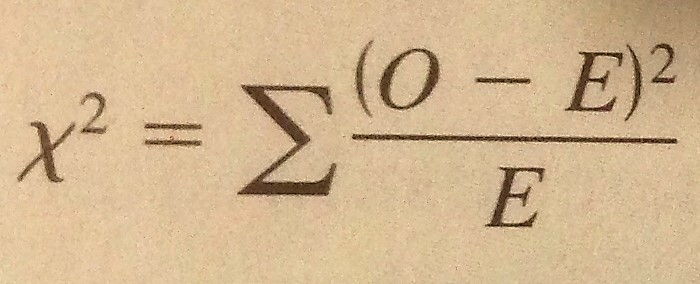

### Implementation

https://machinelearningmastery.com/chi-squared-test-for-machine-learning/

Extension: https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.crosstab.html

In [37]:
def compute_test_for_independence(
    df, # contingency table (eventually create with crosstab)
    alpha=0.05,
):

    # Get statistical values
    stat, p, dof, expected = stats.chi2_contingency(df)
    print('dof=%d' % dof)
   
    print('H0: result is independent of sample group.')
    print('H1: result is dependent on sample group.')
    reject_label = 'Result: dependent (enough evidence to reject H0)'
    not_reject_label = 'Result: independent (fail to reject H0)'
    
    # interpret test-statistic
    prob = 1-alpha
    critical = stats.chi2.ppf(prob, dof)
    print('Traditional method')
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    if abs(stat) >= critical:
        print(reject_label)
    else:
        print(not_reject_label)
    
    # interpret p-value
    print()
    print('p-value method')
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print(reject_label)
    else:
        print(not_reject_label)

### Examples

In [38]:
# Hospitals and infections
# Is there a relationship between hospital and the number of infections for a specific year?
# 3 hospitals selected with frequencies of 3 different infections.
df_hospital_infection = pd.DataFrame({
#     'hospital' : ['A', 'B', 'C'], # labels irrelevant for the analysis
    'surgical_site_infection': [41, 36, 169],
    'pneumonia_infection': [27, 3, 106],
    'bloodstream_infection': [51, 40, 109],
})
compute_test_for_independence(
    df=df_hospital_infection,
    alpha=0.05,
)

dof=4
H0: result is independent of sample group.
H1: result is dependent on sample group.
Traditional method
probability=0.950, critical=9.488, stat=30.696
Result: dependent (enough evidence to reject H0)

p-value method
significance=0.050, p=0.000
Result: dependent (enough evidence to reject H0)


In [39]:
# Alcohol and genders
# We want to know if there is relationship between gender and amount of alcohol consumed.
# Claim: amount of alcohol a person consumes is dependent on the gender.
df_alcohol_gender = pd.DataFrame({
#     'gender' : ['M', 'F'],
    'low': [10, 13],
    'moderate': [9, 16],
    'high': [8, 12],
})
compute_test_for_independence(
    df=df_alcohol_gender,
    alpha=0.10,
)

dof=2
H0: result is independent of sample group.
H1: result is dependent on sample group.
Traditional method
probability=0.900, critical=4.605, stat=0.281
Result: independent (fail to reject H0)

p-value method
significance=0.100, p=0.869
Result: independent (fail to reject H0)


## Test proportions for homogeneity

Samples are selected from different populations and we want to know if the proportion of elements with specific characteristic are the same for each population.

**Basically, same as test for independence but with converted proportions and different hypothesis statement.**

### Application

Sample of 50 s, 50 l, 50 t and 38 x and find the proportion of smokers for each group and check if equal

### Hypothesis

H0: p1 = p2 = p3 = p4

H1: at least 1 proportion is different from the others.

### Implementation

In [42]:
def compute_test_for_homogeity(
    df, # contingency table with proportions (eventually create with crosstab)
    alpha=0.05,
):

    # Get statistical values
    stat, p, dof, expected = stats.chi2_contingency(df)
    print('dof=%d' % dof)
   
    print('H0: all proportions are the same.')
    print('H1: at least 1 proportion is different from the others.')
    reject_label = 'Result: at least 1 proportion is different from the others (enough evidence to reject H0)'
    not_reject_label = 'Result: all proportions are the same (fail to reject H0)'
    
    # interpret test-statistic
    prob = 1-alpha
    critical = stats.chi2.ppf(prob, dof)
    print('Traditional method')
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    if abs(stat) >= critical:
        print(reject_label)
    else:
        print(not_reject_label)
    
    # interpret p-value
    print()
    print('p-value method')
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print(reject_label)
    else:
        print(not_reject_label)

### Examples

In [43]:
# Money and happiness
# Is there difference in proportions
df_money_happiness = pd.DataFrame({
#     'gender' : ['Happy', 'Not happy'],
    'low': [24, 76],
    'moderate': [33, 67],
    'high': [38, 62],
    'extreme': [49, 51],
})
compute_test_for_homogeity(
    df=df_money_happiness,
    alpha=0.05,
)

dof=3
H0: all proportions are the same.
H1: at least 1 proportion is different from the others.
Traditional method
probability=0.950, critical=7.815, stat=14.149
Result: at least 1 proportion is different from the others (enough evidence to reject H0)

p-value method
significance=0.050, p=0.003
Result: at least 1 proportion is different from the others (enough evidence to reject H0)
